In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Parametro del potenziale (unità in cui M_pl = 1)
m = 1e-5  # Un valore piccolo per garantire slow roll

In [19]:
# Definizione del potenziale e sua derivata
def potential(x1):
    return 0.5 * m**2 * x1**2

def potential_prime(x1):
    return m**2 * x1

# Calcolo di Hubble a partire da phi e phidot usando l'equazione di Friedmann
def Hubble(x1, x2):
    return np.sqrt(0.5 * x2**2 + 0.5 * m**2 *x1)/ 3

In [20]:
# Parameti di slow roll
def epsilon_x(x1, x2):
    # Calcola H^2 dal contributo cinetico e dal potenziale
    H2 = (0.5 * x2**2 + 0.5 * m**2 * x1**2) / 3.0
    # Calcolo dello slow roll parameter: epsilon = 0.5 * (x2^2)/H^2
    return 0.5 * x2**2 / H2

def eta_potential(x1):
    # Calcola il potenziale e la sua derivata seconda
    V = 0.5 * m**2 * x1**2
    V_dd = m**2  # Nel potenziale quadratico V''(phi) = m^2
    # Aggiungiamo un piccolo termine per evitare divisioni per zero
    return V_dd / (V + 1e-10)


In [21]:
# Definizione del sistema di equazioni differenziali
def equations(t, y):
    x1, x2 = y
    H = Hubble(x1, x2)
    #il sistema è il seguente 
    dx1 = x2
    dx2 = -3 * H * x2 - potential_prime(x1)
    return [dx1, dx2]

In [34]:
# Intervallo temporale di integrazione
t_start, t_end = 0, 1e7
t_eval = np.linspace(t_start, t_end, 1000)
y0_a = [15, 0]

sol_a = solve_ivp(equations, (t_start, t_end), y0_a, t_eval=t_eval, rtol=1e-9, atol=1e-12)



/tmp/ipykernel_24193/494202941.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(0.5 * x2**2 + 0.5 * m**2 *x1)/ 3


<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_24193/1096907619.py:14: SyntaxWarning: invalid escape sequence '\p'
  axes[0, 0].set_title('Evoluzione del campo $\phi(t)$')
/tmp/ipykernel_24193/1096907619.py:24: SyntaxWarning: invalid escape sequence '\d'
  axes[0, 1].set_title('Evoluzione di $\dot\phi(t)$')


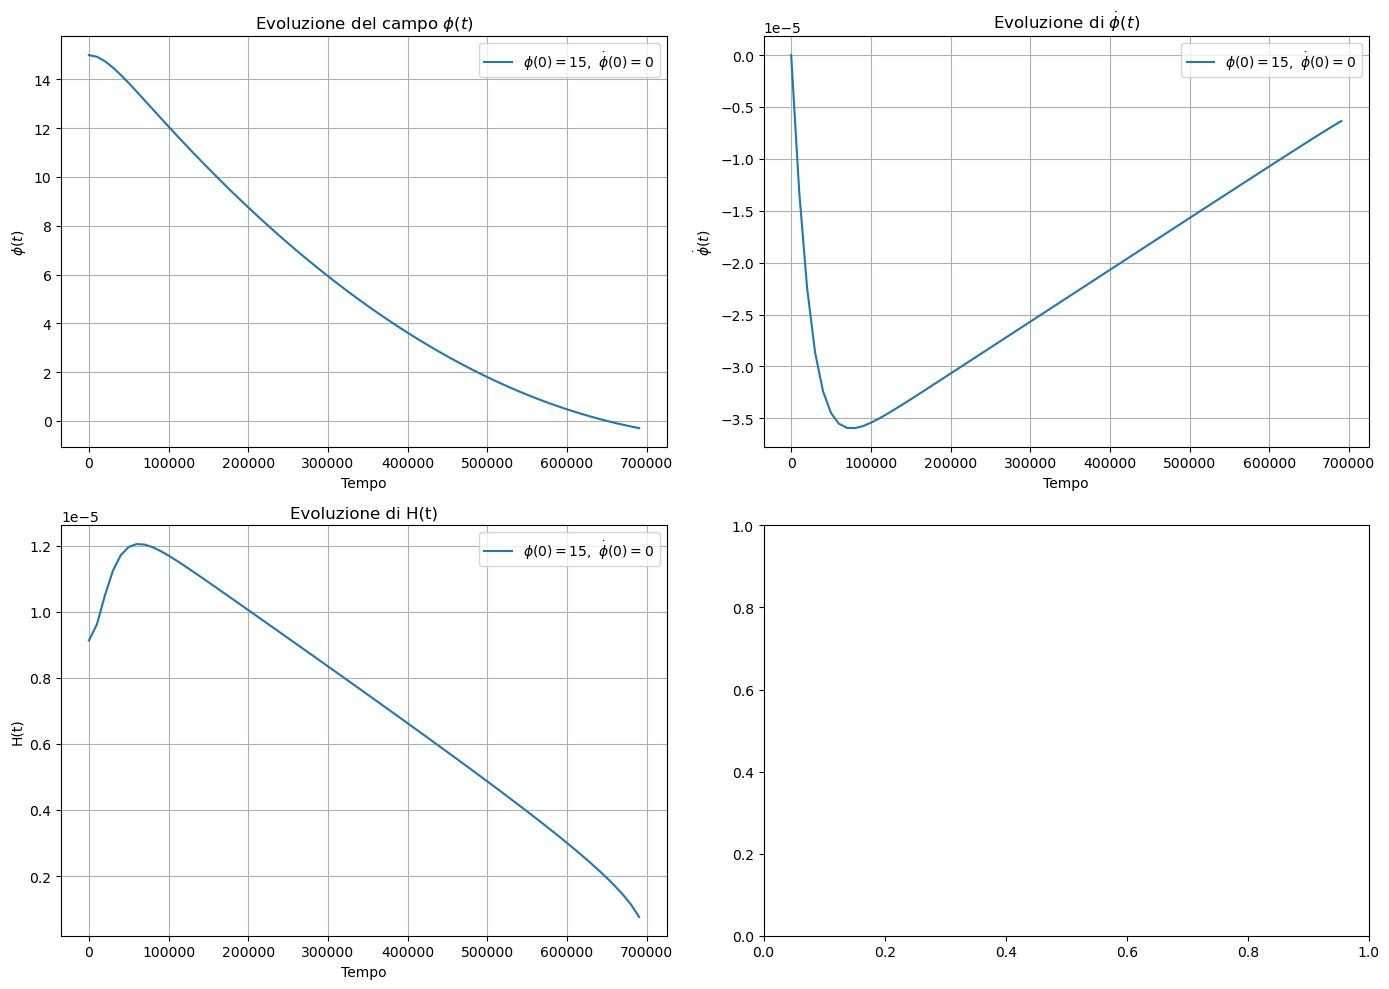

In [35]:
x1_a = sol_a.y[0]
x2_a = sol_a.y[1]
H_a= Hubble(x1_a, x2_a)

# Creazione della figura con subplots vicini
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Evoluzione di φ(t)
axes[0, 0].plot(sol_a.t, x1_a, label=r'$\phi(0)=15,\ \dot\phi(0)=0$')
#axes[0, 0].plot(sol_b.t, phi_b, label=r'$\phi(0)=15,\ \dot\phi(0)=-1\times10^{-7}$')
#axes[0, 0].plot(sol_c.t, phi_c, label=r'$\phi(0)=5,\ \dot\phi(0)=0$')
axes[0, 0].set_xlabel('Tempo')
axes[0, 0].set_ylabel(r'$\phi(t)$')
axes[0, 0].set_title('Evoluzione del campo $\phi(t)$')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Evoluzione di φ̇(t)
axes[0, 1].plot(sol_a.t, x2_a, label=r'$\phi(0)=15,\ \dot\phi(0)=0$')
#axes[0, 1].plot(sol_b.t, phidot_b, label=r'$\phi(0)=15,\ \dot\phi(0)=-1\times10^{-7}$')
##axes[0, 1].plot(sol_c.t, phidot_c, label=r'$\phi(0)=5,\ \dot\phi(0)=0$')
axes[0, 1].set_xlabel('Tempo')
axes[0, 1].set_ylabel(r'$\dot\phi(t)$')
axes[0, 1].set_title('Evoluzione di $\dot\phi(t)$')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Evoluzione di H(t)
axes[1, 0].plot(sol_a.t, H_a, label=r'$\phi(0)=15,\ \dot\phi(0)=0$')
#axes[1, 0].plot(sol_b.t, H_b, label=r'$\phi(0)=15,\ \dot\phi(0)=-1\times10^{-7}$')
#axes[1, 0].plot(sol_c.t, H_c, label=r'$\phi(0)=5,\ \dot\phi(0)=0$')
axes[1, 0].set_xlabel('Tempo')
axes[1, 0].set_ylabel('H(t)')
axes[1, 0].set_title('Evoluzione di H(t)')
axes[1, 0].legend()
axes[1, 0].grid(True)

plt.tight_layout()
plt.show()

<>:49: SyntaxWarning: invalid escape sequence '\d'
<>:49: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_24193/3548024531.py:49: SyntaxWarning: invalid escape sequence '\d'
  plt.title("Evoluzione di $\dot\phi(t)$")


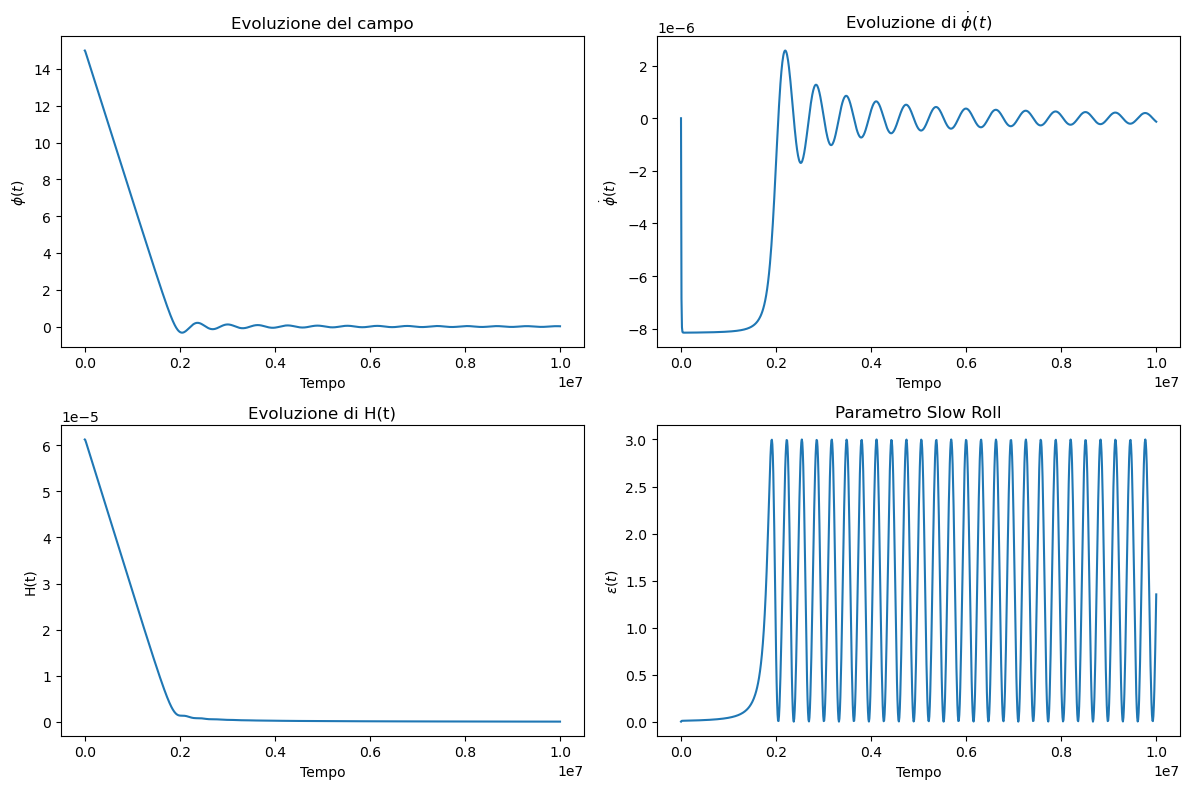

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Impostazioni del potenziale (unità in cui M_pl = 1)
m = 1e-5

def potential(phi):
    return 0.5 * m**2 * phi**2

def potential_prime(phi):
    return m**2 * phi

def Hubble(phi, phidot):
    # Calcolo dell'argomento: deve rimanere non negativo
    arg = (0.5 * phidot**2 + potential(phi)) / 3
    if np.any(arg < 0):
        print("Attenzione: argomento negativo in sqrt", arg)
    return np.sqrt(arg)

def equations(t, y):
    phi, phidot = y
    H = Hubble(phi, phidot)
    return [phidot, -3*H*phidot - potential_prime(phi)]

t_start, t_end = 0, 1e7
t_eval = np.linspace(t_start, t_end, 1000)
y0 = [15, 0]

sol = solve_ivp(equations, (t_start, t_end), y0, t_eval=t_eval, rtol=1e-9, atol=1e-12)

# Calcolo delle quantità slow roll
phi = sol.y[0]
phidot = sol.y[1]
H_vals = Hubble(phi, phidot)
epsilon = 0.5 * phidot**2 / (H_vals**2)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(sol.t, phi)
plt.xlabel("Tempo")
plt.ylabel(r"$\phi(t)$")
plt.title("Evoluzione del campo")

plt.subplot(2,2,2)
plt.plot(sol.t, phidot)
plt.xlabel("Tempo")
plt.ylabel(r"$\dot\phi(t)$")
plt.title("Evoluzione di $\dot\phi(t)$")

plt.subplot(2,2,3)
plt.plot(sol.t, H_vals)
plt.xlabel("Tempo")
plt.ylabel("H(t)")
plt.title("Evoluzione di H(t)")

plt.subplot(2,2,4)
plt.plot(sol.t, epsilon)
plt.xlabel("Tempo")
plt.ylabel(r"$\epsilon(t)$")
plt.title("Parametro Slow Roll")

plt.tight_layout()
plt.show()


<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_24193/4290405168.py:31: SyntaxWarning: invalid escape sequence '\p'
  axes[0].set_title("Evoluzione del campo $\phi(t)$")
/tmp/ipykernel_24193/4290405168.py:36: SyntaxWarning: invalid escape sequence '\d'
  axes[1].set_title("Evoluzione di $\dot\phi(t)$")
/tmp/ipykernel_24193/494202941.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(0.5 * x2**2 + 0.5 * m**2 *x1)/ 3


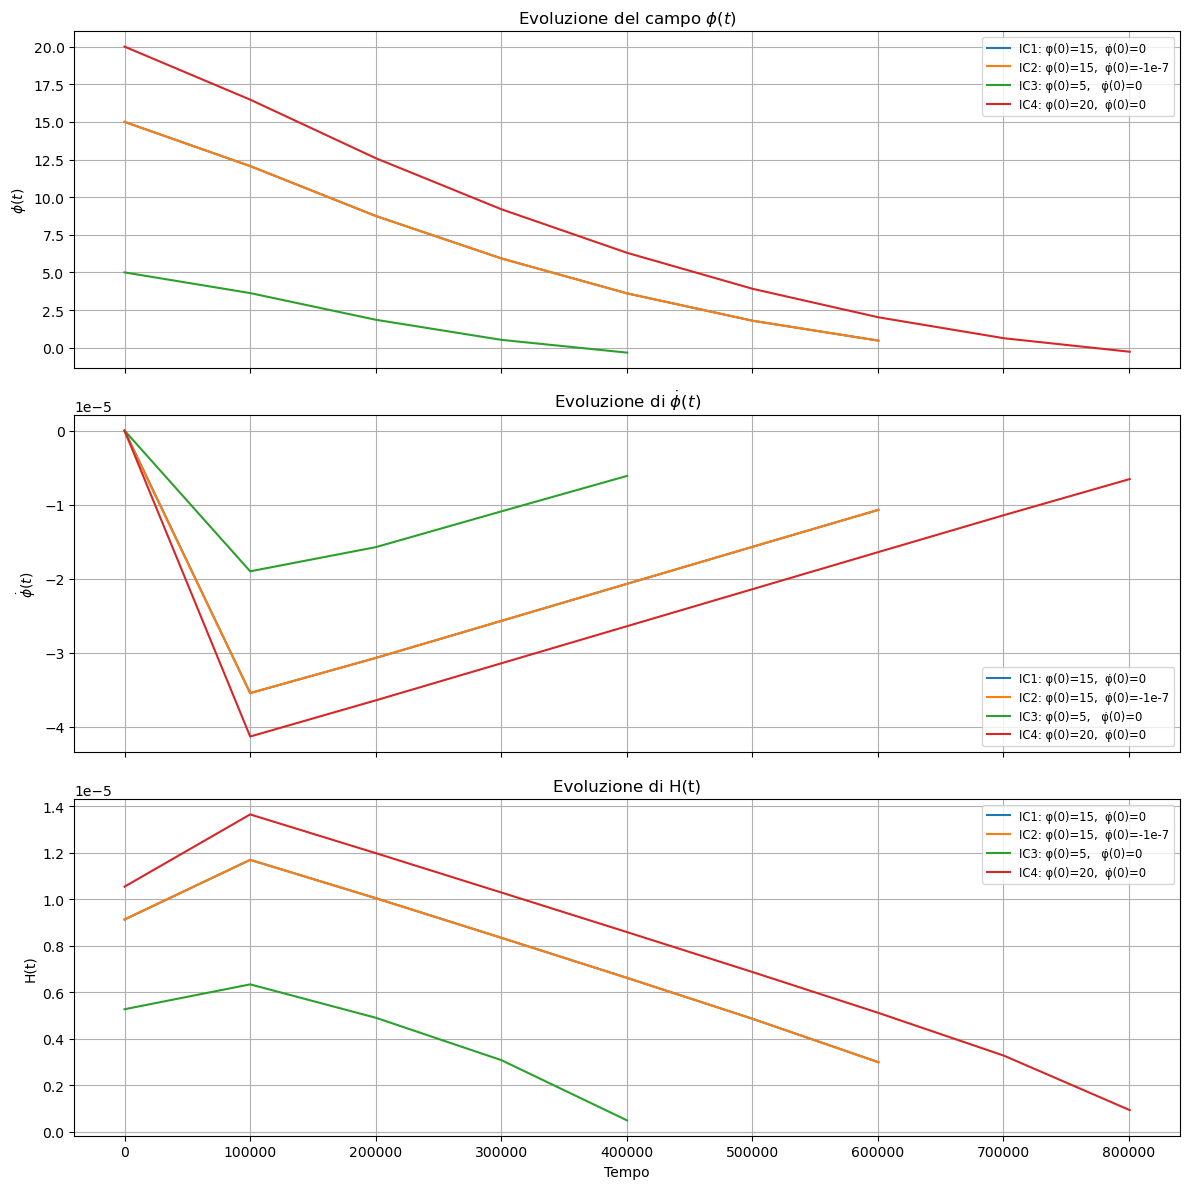

In [37]:
# Definizione di più condizioni iniziali
initial_conditions = {
    "IC1: φ(0)=15,  φ̇(0)=0": [15, 0],
    "IC2: φ(0)=15,  φ̇(0)=-1e-7": [15, -1e-7],
    "IC3: φ(0)=5,   φ̇(0)=0": [5, 0],
    "IC4: φ(0)=20,  φ̇(0)=0": [20, 0],
}

t_start, t_end = 0, 1e8
t_eval = np.linspace(t_start, t_end, 1000)

# Risoluzione del sistema per ciascuna condizione iniziale
solutions = {}
for label, y0 in initial_conditions.items():
    sol = solve_ivp(equations, (t_start, t_end), y0, t_eval=t_eval, rtol=1e-9, atol=1e-12)
    solutions[label] = sol

# Creazione dei grafici: phi(t), phidot(t) e H(t)
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

for label, sol in solutions.items():
    phi = sol.y[0]
    phidot = sol.y[1]
    H_vals = Hubble(phi, phidot)
    
    axes[0].plot(sol.t, phi, label=label)
    axes[1].plot(sol.t, phidot, label=label)
    axes[2].plot(sol.t, H_vals, label=label)

axes[0].set_ylabel(r"$\phi(t)$")
axes[0].set_title("Evoluzione del campo $\phi(t)$")
axes[0].grid(True)
axes[0].legend(fontsize="small")

axes[1].set_ylabel(r"$\dot\phi(t)$")
axes[1].set_title("Evoluzione di $\dot\phi(t)$")
axes[1].grid(True)
axes[1].legend(fontsize="small")

axes[2].set_ylabel("H(t)")
axes[2].set_title("Evoluzione di H(t)")
axes[2].set_xlabel("Tempo")
axes[2].grid(True)
axes[2].legend(fontsize="small")

plt.tight_layout()
plt.show()

<>:85: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_24193/79970432.py:85: SyntaxWarning: invalid escape sequence '\p'
  axes[0].set_title("Evoluzione del campo $\phi(t)$ (t ≤ 10⁶)")


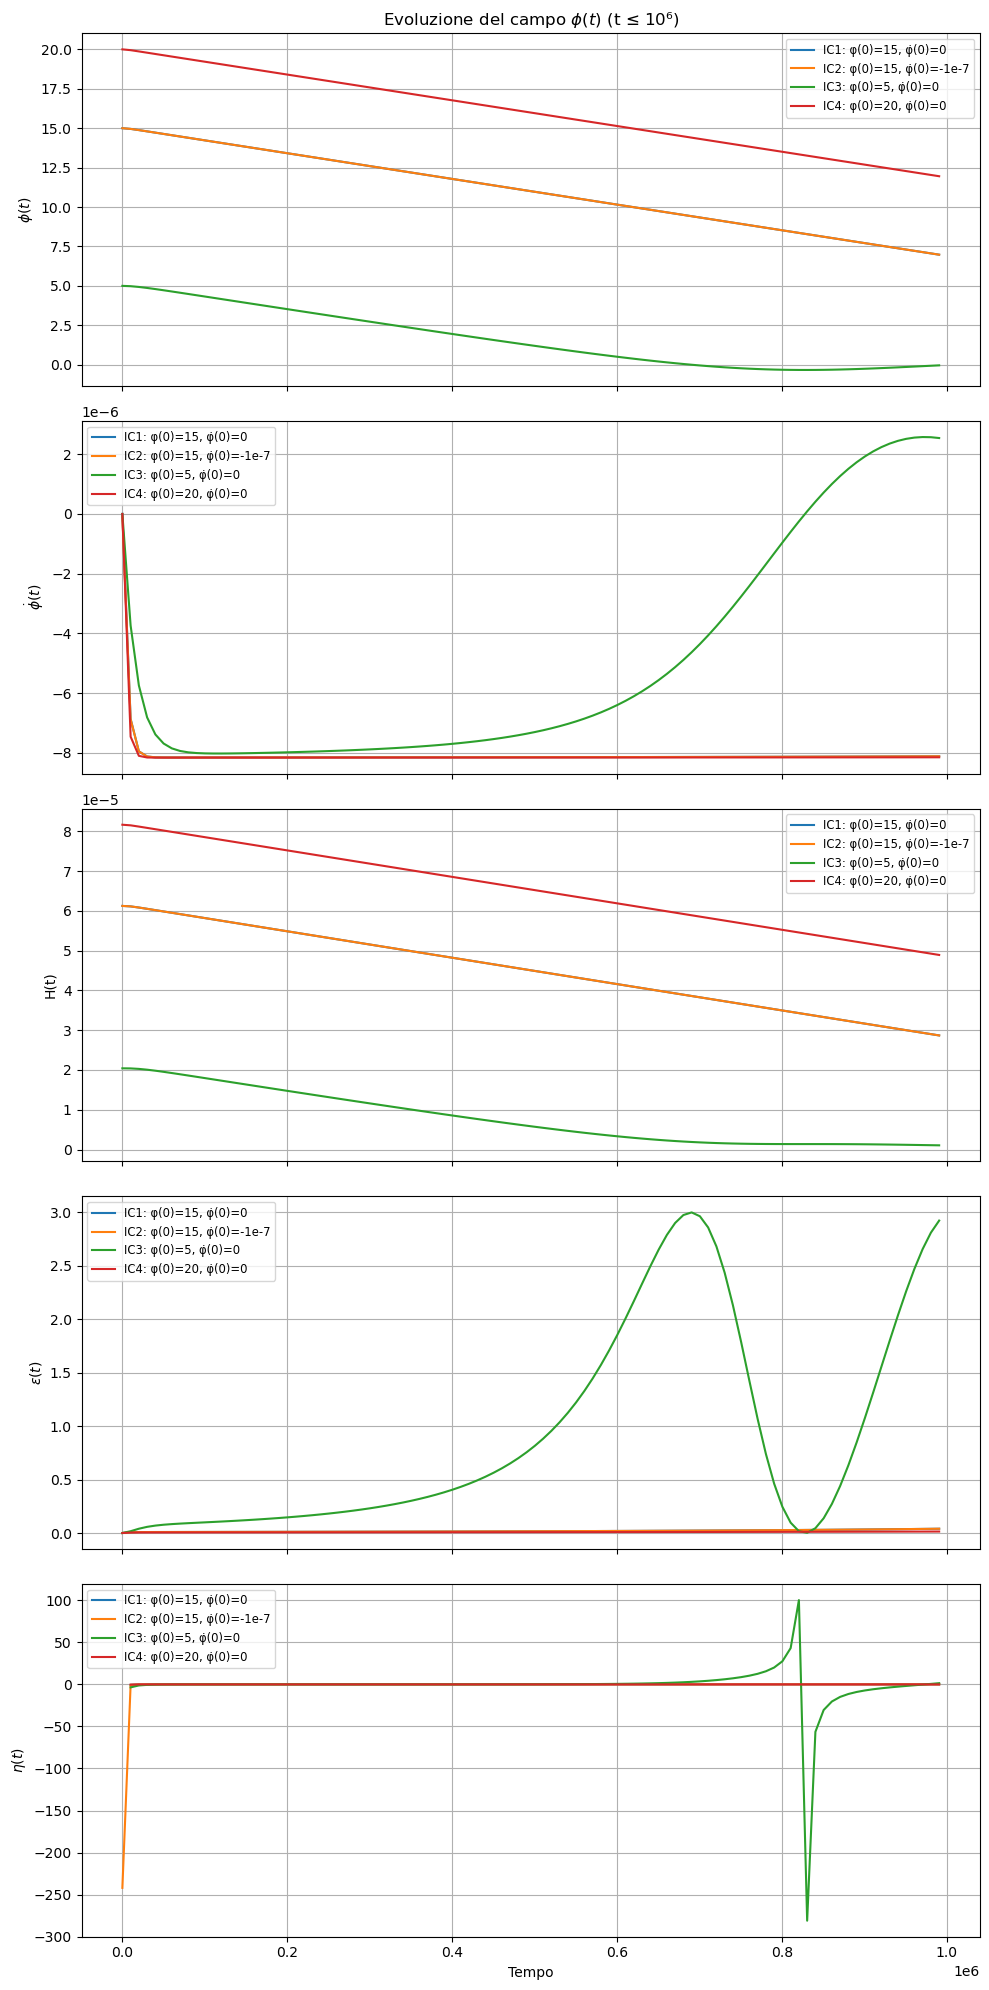

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parametro del potenziale (unità in cui M_pl = 1)
m = 1e-5

# Potenziale quadratico e sua derivata:
def potential(phi):
    return 0.5 * m**2 * phi**2

def potential_prime(phi):
    return m**2 * phi

# Calcolo del parametro di Hubble: H = sqrt((0.5*phidot^2 + V(phi))/3)
def Hubble(phi, phidot):
    # argomento della radice deve essere non negativo
    arg = (0.5 * phidot**2 + potential(phi)) / 3.0
    if np.any(arg < 0):
        print("Attenzione: argomento negativo in sqrt", arg)
    return np.sqrt(arg)

# Definizione del sistema di equazioni (campo scalare e sua derivata)
def equations(t, y):
    phi, phidot = y
    H = Hubble(phi, phidot)
    dphi_dt = phidot
    dphidot_dt = -3 * H * phidot - potential_prime(phi)
    return [dphi_dt, dphidot_dt]

# Definiamo diverse condizioni iniziali con etichette per il confronto
initial_conditions = {
    "IC1: φ(0)=15, φ̇(0)=0": [15, 0],
    "IC2: φ(0)=15, φ̇(0)=-1e-7": [15, -1e-7],
    "IC3: φ(0)=5, φ̇(0)=0": [5, 0],
    "IC4: φ(0)=20, φ̇(0)=0": [20, 0],
}

# Intervallo temporale per l'integrazione: estendiamo fino a t = 1e7
t_start, t_end = 0, 1e7
t_eval = np.linspace(t_start, t_end, 1000)

# Risolviamo il sistema per ogni condizione iniziale
solutions = {}
for label, y0 in initial_conditions.items():
    sol = solve_ivp(equations, (t_start, t_end), y0, t_eval=t_eval, rtol=1e-9, atol=1e-12)
    solutions[label] = sol

# Funzione per calcolare le quantità derivate: φ, φ̇, H, ε e η.
def compute_quantities(sol):
    phi = sol.y[0]
    phidot = sol.y[1]
    H_vals = Hubble(phi, phidot)
    # ε = 0.5*(phidot^2)/(H^2)
    epsilon = 0.5 * phidot**2 / (H_vals**2)
    # Calcoliamo ddphi da: ddphi = -3Hφ̇ - V'(φ)
    ddphi = -3 * H_vals * phidot - potential_prime(phi)
    # Definiamo η = - (ddphi)/(H * φ̇). Per evitare divisioni per zero, se φ̇ è quasi zero, η = NaN.
    eta = np.empty_like(phi)
    for i in range(len(phi)):
        if np.abs(phidot[i]) > 1e-12:
            eta[i] = - ddphi[i] / (H_vals[i] * phidot[i])
        else:
            eta[i] = np.nan
    return phi, phidot, H_vals, epsilon, eta

# Per studiare il regime slow roll, limitiamo l'analisi ai tempi t <= 1e6.
t_max_analysis = 1e6

# Creazione dei grafici per l'analisi dello slow roll:
# Vogliamo tracciare in un'unica figura: φ(t), φ̇(t), H(t), ε(t) e η(t)
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for label, sol in solutions.items():
    phi, phidot, H_vals, epsilon, eta = compute_quantities(sol)
    # Seleziono solo i dati con t <= t_max_analysis
    idx = sol.t <= t_max_analysis
    axes[0].plot(sol.t[idx], phi[idx], label=label)
    axes[1].plot(sol.t[idx], phidot[idx], label=label)
    axes[2].plot(sol.t[idx], H_vals[idx], label=label)
    axes[3].plot(sol.t[idx], epsilon[idx], label=label)
    axes[4].plot(sol.t[idx], eta[idx], label=label)

axes[0].set_ylabel(r"$\phi(t)$")
axes[0].set_title("Evoluzione del campo $\phi(t)$ (t ≤ 10⁶)")
axes[1].set_ylabel(r"$\dot{\phi}(t)$")
axes[2].set_ylabel("H(t)")
axes[3].set_ylabel(r"$\epsilon(t)$")
axes[4].set_ylabel(r"$\eta(t)$")
axes[4].set_xlabel("Tempo")
for ax in axes:
    ax.grid(True)
    ax.legend(fontsize="small")
plt.tight_layout()
plt.show()


In [38]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parametri
m = 1e-6
t_span = (0, 1e8)
t_eval = np.linspace(*t_span, 1000)

# Sistema dinamico
def dynamics_x(t, x):
    x1, x2 = x
    V = 0.5 * m**2 * x1**2
    H = np.sqrt((0.5 * x2**2 + V) / 3)
    dx1dt = x2
    dx2dt = -3 * H * x2 - m**2 * x1
    return [dx1dt, dx2dt]

# Funzioni ausiliarie
def epsilon_x(x1, x2):
    #H = np.sqrt((0.5 * x2**2 + 0.5 * m**2 * x1**2) / 3)#modificare
    H_allasec=((0.5*x2**2)+ (0.5*m**2*x1**2))/3
    return x2**2 / (2 * H_allasec)

def Hubble_x(x1, x2):
    return np.sqrt((0.5 * x2**2 + 0.5 * m**2 * x1**2) / 3)

def eta_potential(x1):
    V = 0.5 * m**2 * x1**2
    V_dd = m**2
    return V_dd / (V )
    #return V_dd / (V + 1e-10)



initial_conditions = [
    (10, 0),
    (15, 0),
    (15, 1e-6),
    (20, -1e-6),
]

results_x = []
for x1_0, x2_0 in initial_conditions:
    sol = solve_ivp(dynamics_x, t_span, [x1_0, x2_0], t_eval=t_eval, rtol=1e-8)
    x1 = sol.y[0]
    x2 = sol.y[1]
    H_vals = Hubble_x(x1, x2)
    eps_vals = epsilon_x(x1, x2)
    eta_vals = eta_potential(x1)
    results_x.append({
        't': sol.t,
        'x1': x1,
        'x2': x2,
        'H': H_vals,
        'epsilon': eps_vals,
        'eta': eta_vals,
        'x1_0': x1_0,
        'x2_0': x2_0
    })


<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\d'
<>:87: SyntaxWarning: invalid escape sequence '\e'
<>:88: SyntaxWarning: invalid escape sequence '\e'
<>:89: SyntaxWarning: invalid escape sequence '\e'
<>:90: SyntaxWarning: invalid escape sequence '\e'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\d'
<>:87: SyntaxWarning: invalid escape sequence '\e'
<>:88: SyntaxWarning: invalid escape sequence '\e'
<>:89: SyntaxWarning: invalid escape sequence '\e'
<>:90: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_24193/2740129217.py:81: SyntaxWarning: invalid escape sequence '\p'
  axs[0].set_title("Evoluzione di $x_1(t)$ (campo $\phi$)")
/tmp/ipykernel_24193/2740129217.py:83: SyntaxWarning: invalid escape sequence '\d'
  axs[1].set_title("Evoluzione di $x_2(t)$ ($\dot{\phi}$)")
/tmp/ipykernel_24193/2740129217.py:87: SyntaxWarning: invalid escape sequence '\e'
  axs[3].set_title(

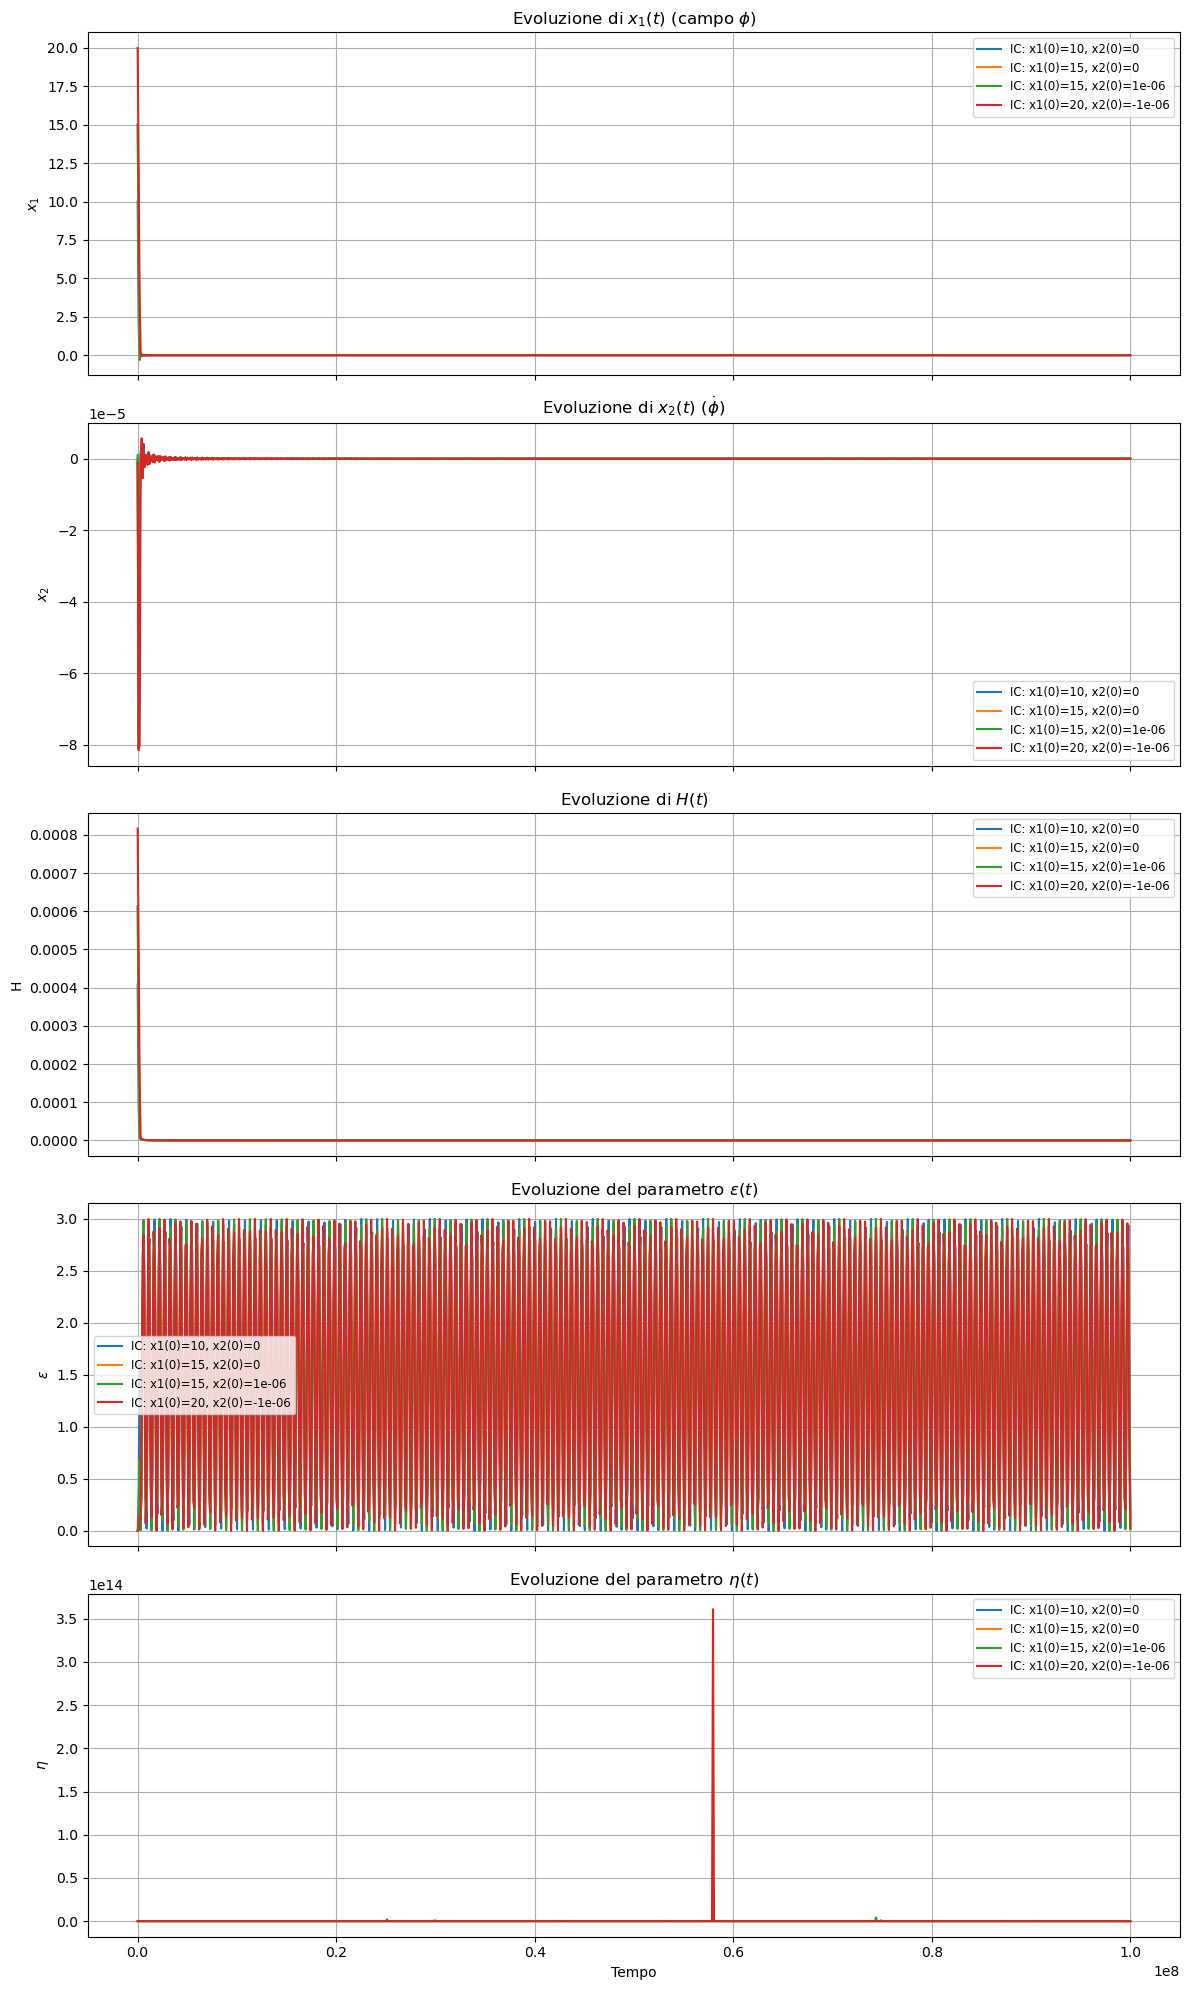

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parametri
m = 1e-4
t_span = (0, 1e8)
t_eval = np.linspace(*t_span, 1000)

# Definizione del sistema dinamico
def dynamics_x(t, x):
    x1, x2 = x
    V = 0.5 * m**2 * x1**2
    H = np.sqrt((0.5 * x2**2 + V) / 3)
    dx1dt = x2
    dx2dt = -3 * H * x2 - m**2 * x1
    return [dx1dt, dx2dt]

# Funzioni ausiliarie
def epsilon_x(x1, x2):
    # Calcolo di H^2: (0.5*x2^2 + 0.5*m^2*x1^2)/3
    H2 = ((0.5 * x2**2) + (0.5 * m**2 * x1**2)) / 3
    # epsilon = 0.5 * x2^2 / H^2
    return 0.5 * x2**2 / H2

def Hubble_x(x1, x2):
    return np.sqrt((0.5 * x2**2 + 0.5 * m**2 * x1**2) / 3)

def eta_potential(x1):
    # Per il potenziale quadratico: V = 0.5*m^2*x1^2 e V'' = m^2, si ha:
    # eta = V''/V = m^2 / (0.5 * m^2 * x1^2) = 2/x1^2
    V = 0.5 * m**2 * x1**2
    V_dd = m**2
    return V_dd / (V)

# Definiamo le condizioni iniziali
initial_conditions = [
    (10, 0),
    (15, 0),
    (15, 1e-6),
    (20, -1e-6),
]

# Eseguiamo l'integrazione per ogni condizione iniziale
results_x = []
for x1_0, x2_0 in initial_conditions:
    sol = solve_ivp(dynamics_x, t_span, [x1_0, x2_0], t_eval=t_eval, rtol=1e-8)
    x1 = sol.y[0]
    x2 = sol.y[1]
    H_vals = Hubble_x(x1, x2)
    eps_vals = epsilon_x(x1, x2)
    eta_vals = eta_potential(x1)
    results_x.append({
        't': sol.t,
        'x1': x1,
        'x2': x2,
        'H': H_vals,
        'epsilon': eps_vals,
        'eta': eta_vals,
        'x1_0': x1_0,
        'x2_0': x2_0
    })

# Creazione dei grafici
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=True)

for res in results_x:
    t = res['t']
    x1 = res['x1']
    x2 = res['x2']
    H_vals = res['H']
    eps = res['epsilon']
    eta = res['eta']
    label = f"IC: x1(0)={res['x1_0']}, x2(0)={res['x2_0']}"
    axs[0].plot(t, x1, label=label)
    axs[1].plot(t, x2, label=label)
    axs[2].plot(t, H_vals, label=label)
    axs[3].plot(t, eps, label=label)
    axs[4].plot(t, eta, label=label)

axs[0].set_title("Evoluzione di $x_1(t)$ (campo $\phi$)")
axs[0].set_ylabel("$x_1$")
axs[1].set_title("Evoluzione di $x_2(t)$ ($\dot{\phi}$)")
axs[1].set_ylabel("$x_2$")
axs[2].set_title("Evoluzione di $H(t)$")
axs[2].set_ylabel("H")
axs[3].set_title("Evoluzione del parametro $\epsilon(t)$")
axs[3].set_ylabel("$\epsilon$")
axs[4].set_title("Evoluzione del parametro $\eta(t)$")
axs[4].set_ylabel("$\eta$")
axs[4].set_xlabel("Tempo")

for ax in axs:
    ax.grid(True)
    ax.legend(fontsize="small")

plt.tight_layout()
plt.show()


<>:83: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\d'
<>:89: SyntaxWarning: invalid escape sequence '\e'
<>:90: SyntaxWarning: invalid escape sequence '\e'
<>:91: SyntaxWarning: invalid escape sequence '\e'
<>:92: SyntaxWarning: invalid escape sequence '\e'
<>:83: SyntaxWarning: invalid escape sequence '\p'
<>:85: SyntaxWarning: invalid escape sequence '\d'
<>:89: SyntaxWarning: invalid escape sequence '\e'
<>:90: SyntaxWarning: invalid escape sequence '\e'
<>:91: SyntaxWarning: invalid escape sequence '\e'
<>:92: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_24193/740674011.py:83: SyntaxWarning: invalid escape sequence '\p'
  axs[0].set_title("Evoluzione di $x_1(t)$ (campo $\phi$)")
/tmp/ipykernel_24193/740674011.py:85: SyntaxWarning: invalid escape sequence '\d'
  axs[1].set_title("Evoluzione di $x_2(t)$ ($\dot{\\phi}$)")
/tmp/ipykernel_24193/740674011.py:89: SyntaxWarning: invalid escape sequence '\e'
  axs[3].set_title("E

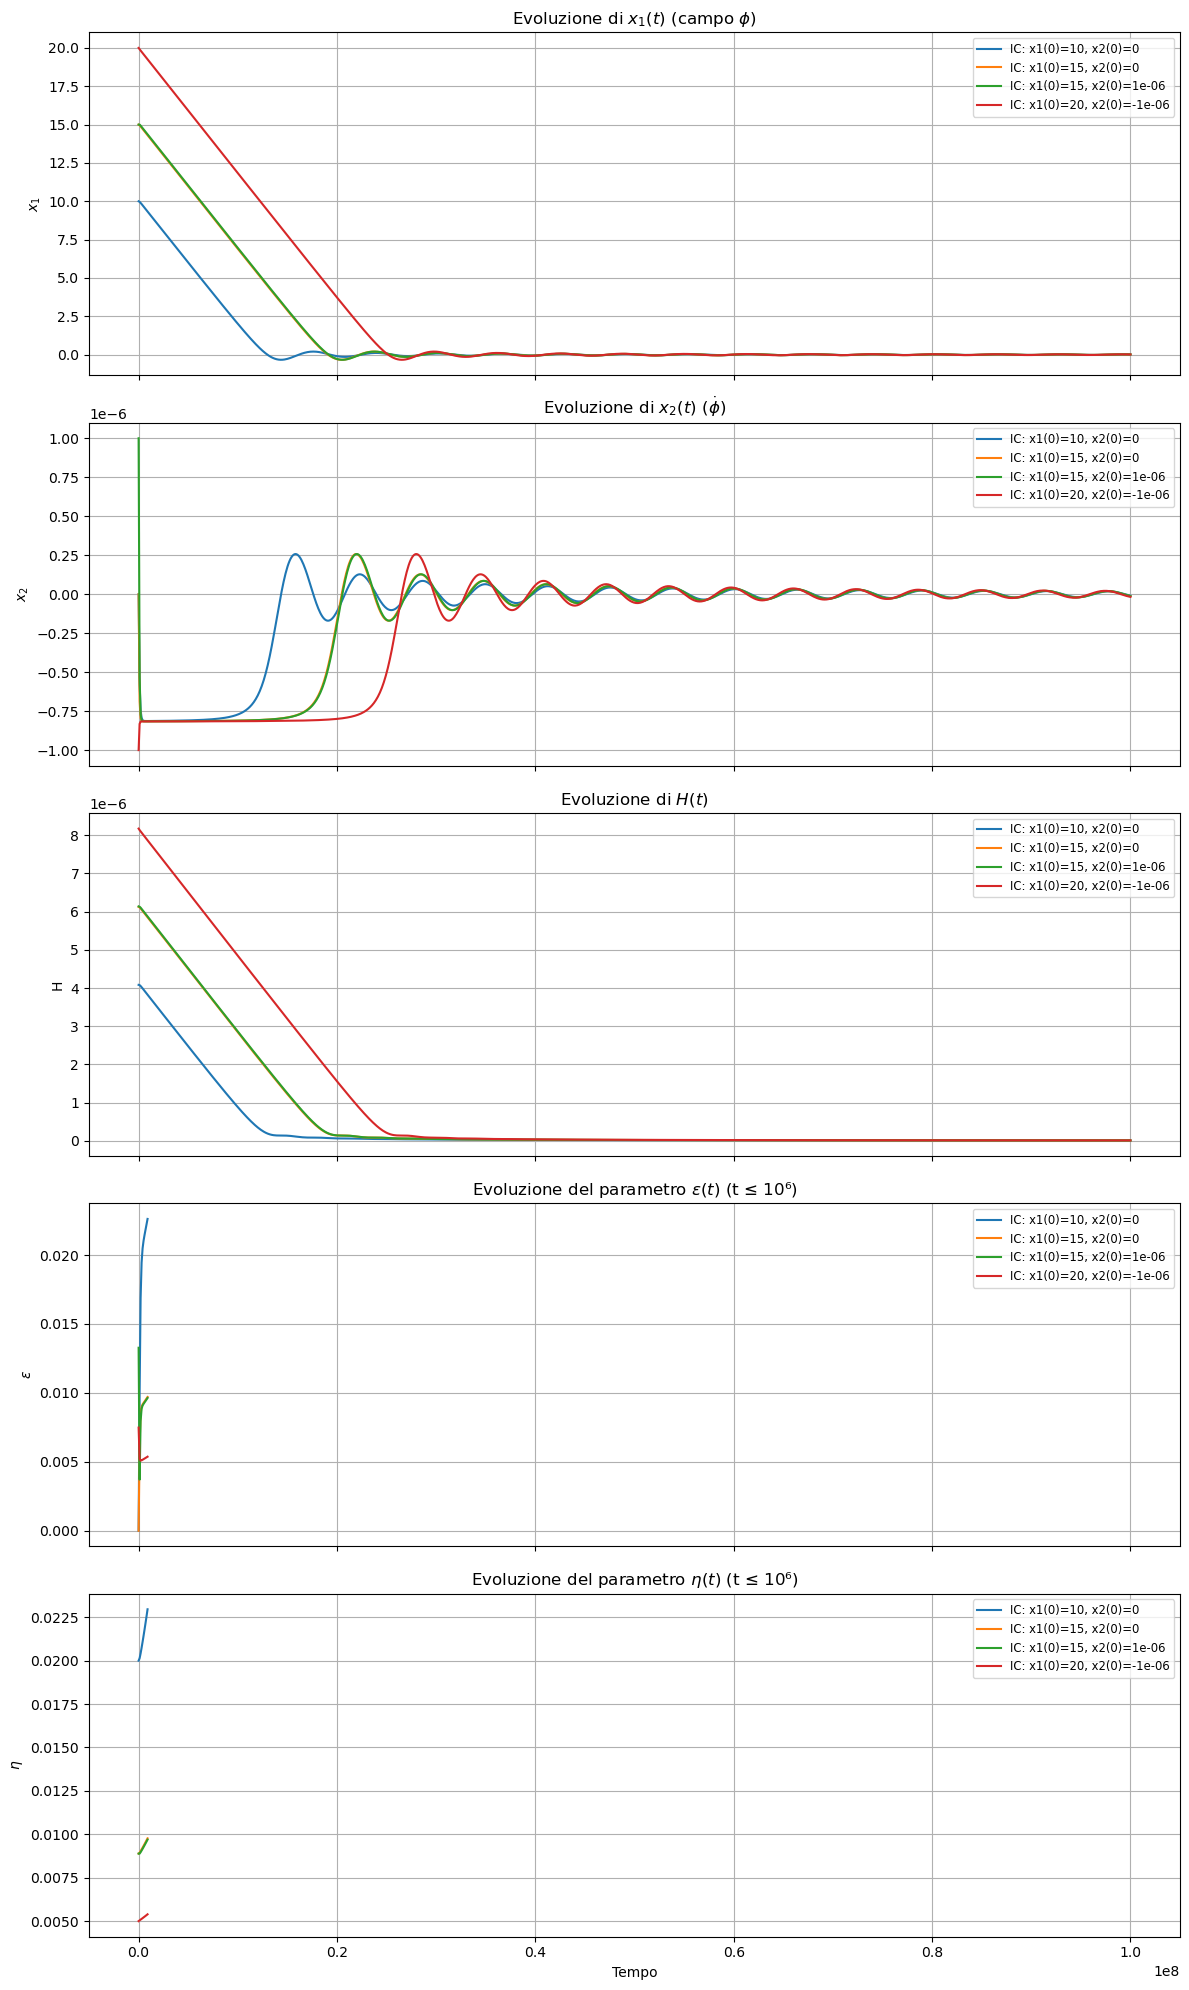

In [40]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parametri
m = 1e-6
t_span = (0, 1e8)
t_eval = np.linspace(*t_span, 1000)

# Sistema dinamico
def dynamics_x(t, x):
    x1, x2 = x
    V = 0.5 * m**2 * x1**2
    H = np.sqrt((0.5 * x2**2 + V) / 3)
    dx1dt = x2
    dx2dt = -3 * H * x2 - m**2 * x1
    return [dx1dt, dx2dt]

# Funzioni ausiliarie per il calcolo dei parametri slow roll e Hubble
def epsilon_x(x1, x2):
    H2 = ((0.5 * x2**2) + (0.5 * m**2 * x1**2)) / 3.0
    return 0.5 * x2**2 / H2

def Hubble_x(x1, x2):
    return np.sqrt((0.5 * x2**2 + 0.5 * m**2 * x1**2) / 3)

def eta_potential(x1):
    # Per il potenziale quadratico: V = 0.5*m^2*x1^2, V'' = m^2
    # eta = V''/V = m^2/(0.5*m^2*x1^2) = 2/x1^2
    V = 0.5 * m**2 * x1**2
    V_dd = m**2
    return V_dd / (V)

# Condizioni iniziali
initial_conditions = [
    (10, 0),
    (15, 0),
    (15, 1e-6),
    (20, -1e-6),
]

# Integrazione per ogni condizione iniziale
results_x = []
for x1_0, x2_0 in initial_conditions:
    sol = solve_ivp(dynamics_x, t_span, [x1_0, x2_0], t_eval=t_eval, rtol=1e-8)
    x1 = sol.y[0]
    x2 = sol.y[1]
    H_vals = Hubble_x(x1, x2)
    eps_vals = epsilon_x(x1, x2)
    eta_vals = eta_potential(x1)
    results_x.append({
        't': sol.t,
        'x1': x1,
        'x2': x2,
        'H': H_vals,
        'epsilon': eps_vals,
        'eta': eta_vals,
        'x1_0': x1_0,
        'x2_0': x2_0
    })

# Creazione dei grafici
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=True)

for res in results_x:
    t = res['t']
    x1 = res['x1']
    x2 = res['x2']
    H_vals = res['H']
    eps = res['epsilon']
    eta = res['eta']
    label = f"IC: x1(0)={res['x1_0']}, x2(0)={res['x2_0']}"
    
    axs[0].plot(t, x1, label=label)
    axs[1].plot(t, x2, label=label)
    axs[2].plot(t, H_vals, label=label)
    
    # Limitiamo i plot di epsilon e eta solo a t <= 1e6
    mask = t <= 1e6
    axs[3].plot(t[mask], eps[mask], label=label)
    axs[4].plot(t[mask], eta[mask], label=label)

axs[0].set_title("Evoluzione di $x_1(t)$ (campo $\phi$)")
axs[0].set_ylabel("$x_1$")
axs[1].set_title("Evoluzione di $x_2(t)$ ($\dot{\\phi}$)")
axs[1].set_ylabel("$x_2$")
axs[2].set_title("Evoluzione di $H(t)$")
axs[2].set_ylabel("H")
axs[3].set_title("Evoluzione del parametro $\epsilon(t)$ (t ≤ 10⁶)")
axs[3].set_ylabel("$\epsilon$")
axs[4].set_title("Evoluzione del parametro $\eta(t)$ (t ≤ 10⁶)")
axs[4].set_ylabel("$\eta$")
axs[4].set_xlabel("Tempo")

for ax in axs:
    ax.grid(True)
    ax.legend(fontsize="small")

plt.tight_layout()
plt.show()
